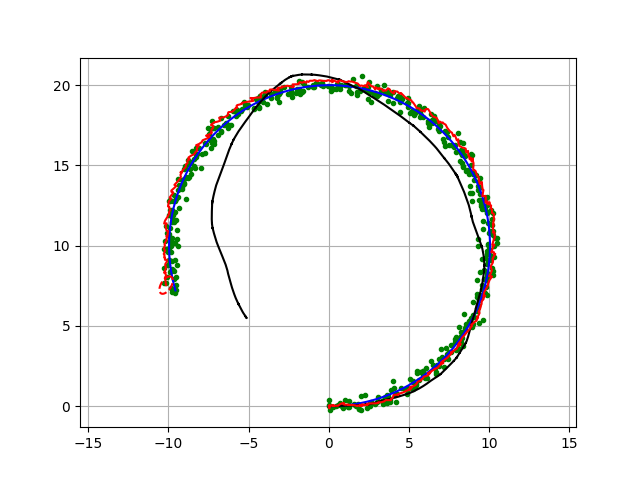

In [3]:
from IPython.display import Image
Image(filename="eif.png",width=600)

The Extended Information Filter(EIF) is the dual dual of the EKF using the information form. Rather than being composed of a mean $x$ and covariance $P$ it instead uses the information vector $\xi$ and the information matrix $\Omega$.

The EKF is known as the moment form, whereas the information version is known as the canonical form. They are related to each other via the following equations

$$ P = \Omega ^{-1} $$
$$ x = \Omega^{-1} \xi $$

and the inverse

$$ \Omega = P^{-1} $$
$$ \xi = P^{-1} x $$

Using these relationships you can convert the EKF steps into the EIF form. Your equations end up looking like

**Prediction**
$$ x_{k-1|k-1}= \Omega^{-1} * \xi_{k-1|k-1} $$
$$ x_{k|k-1} = f(x_{k-1|k-1},u) $$
$$ \Omega_{k|k-1} = (F *\Omega^{-1}_{k-1|k-1}* F^{T}+ Q_k)^{-1} $$ 
** Update **
$$ y=z_k-h(x_{k|k-1}) $$
$$ \xi_{k|k-1} = \Omega*x_{k|k-1} $$
$$ \xi_{k|k}= \xi_{k|k-1} * H_{k}^{T}*R^{-1}*(y+H_k*x_{k|k-1}) $$
$$ \Omega_{k|k}=\Omega_{k|k-1}+H_{k}^T*R^{-1}*H_k $$
$H_k$ and $F_k$ are the same jacobians as in the EKF.





### Pros and Cons

The EIF has couple of advantages compared to the EKF.
* It is more stable numerically.
    * Further variants such as the Square Root Information Filter are even more stable, allowing you to sometimes change the floating point representation from float64 to float32.
* The measurement update step is more efficient. This is because n measurements can be fused by simply summing their information matrices and vectors.

Its disadvantages are:
* More costly prediction step.
    * In many applications the prediction step runs at a higher rate.
* Marginalization is tricky in the information form. 
    * This is an advanced topic that pops up in graph slam a lot. When you want to remove older landmarks you must take special care to 
    remove the cross correlations in the information matrix. In the covariance matrix you just drop the rows and columns that contain the removed       landmark.
 

### Usage

While the basic information filter is rarely used compared to its EKF counterpart, its variants pop up in a lot of different applications. Most notably in the square root information filter(SRIF), and in graph slam. While graph slam is considered by many to be a seperate algorithm from EKFs and other filtering approaches, it is in actuallity just an iterative extended information filter. The numerical representation of a graph is the Hessian matrix which is equivalent to the information matrix.

### References:

- [Freiburg Extended Information Filter Notes](http://ais.informatik.uni-freiburg.de/teaching/ws12/mapping/pdf/slam06-eif.pdf)
- [Square Root SAM](https://www.cc.gatech.edu/~dellaert/pub/Dellaert06ijrr.pdf)
 